In [4]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import seaborn as sn

Pregnancies: il numero di gravidanze che la paziente ha avuto.
Glucose: la concentrazione di glucosio nel plasma a digiuno, in milligrammi per decilitro (mg/dl).
BloodPressure: la pressione sanguigna diastolica (mm Hg).
SkinThickness: lo spessore della pelle (mm).
Insulin: la quantità di insulina nel sangue, in milliunità per millilitro (mu/ml).
BMI: l'indice di massa corporea, calcolato come il peso in kg diviso per l'altezza in metri al quadrato.
DiabetesPedigreeFunction: una misura della predisposizione genetica al diabete, calcolata sulla base della storia familiare.
Age: l'età della paziente in anni.
Outcome: la variabile dipendente, che indica se la paziente ha o meno il diabete (1 = ha il diabete, 0 = non ha il diabete).

In [5]:
diabete = pd.read_csv(r"C:\Users\franc\OneDrive\Desktop\diabetes.csv")
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabete.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabete.duplicated().sum()

np.int64(0)

In [17]:
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

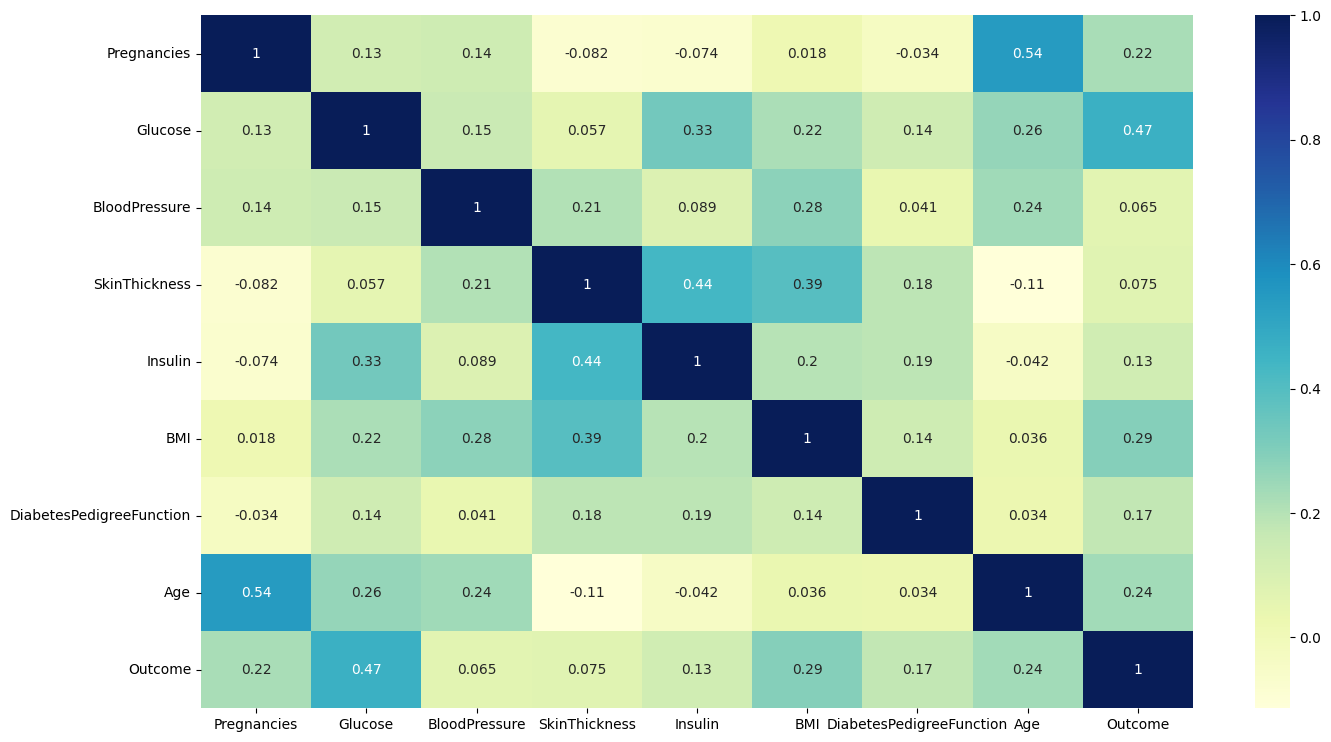

In [20]:
correlazione = diabete.corr()

plt.figure(figsize = (16, 9))
sn.heatmap(correlazione, cmap = "YlGnBu", annot = True)

In [82]:
diabete.groupby(['Age', 'Glucose']).mean().Outcome

Age  Glucose
21   0          0.0
     71         0.0
     73         0.0
     78         0.0
     80         0.0
               ... 
69   132        0.0
     136        0.0
70   145        1.0
72   119        0.0
81   134        0.0
Name: Outcome, Length: 664, dtype: float64

Eta presa in considerazione : 50


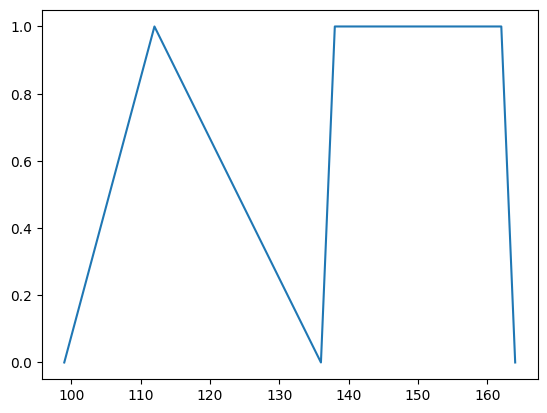

Eta presa in considerazione : 31


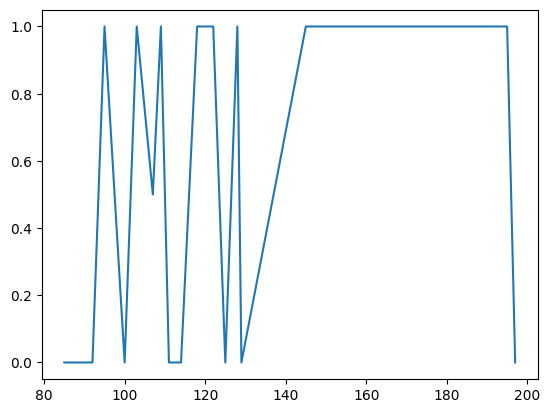

Eta presa in considerazione : 32


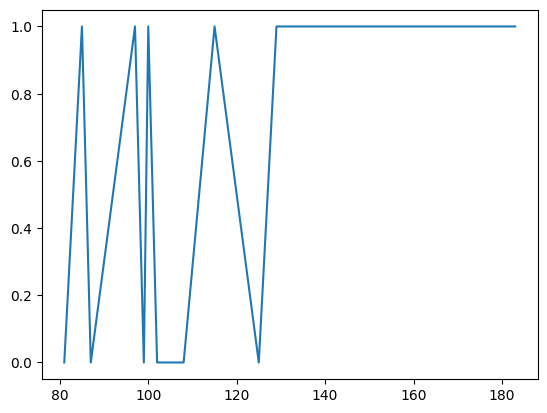

Eta presa in considerazione : 21


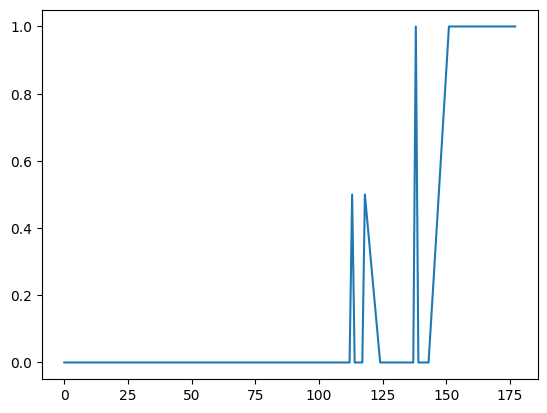

Eta presa in considerazione : 33


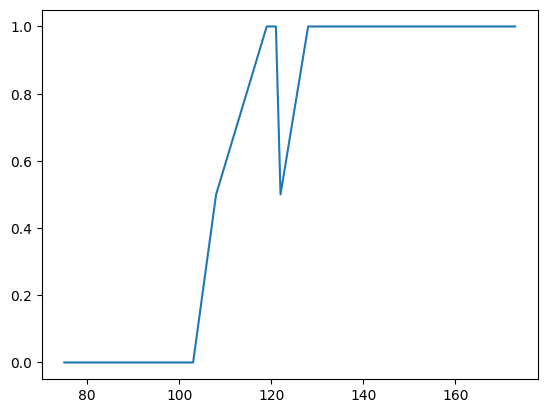

Eta presa in considerazione : 30


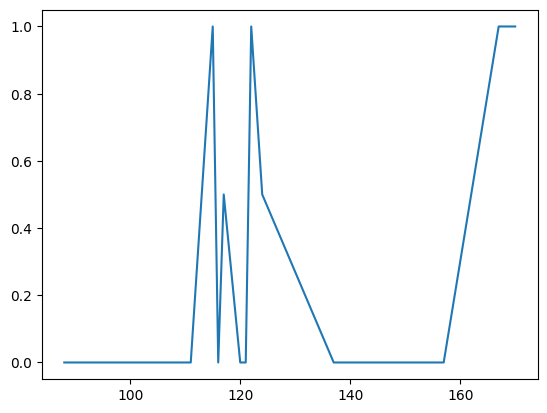

Eta presa in considerazione : 26


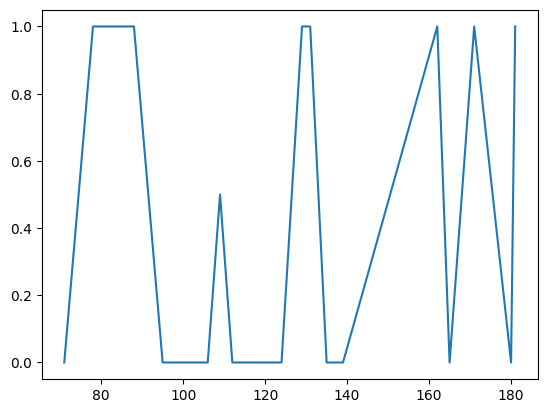

Eta presa in considerazione : 29


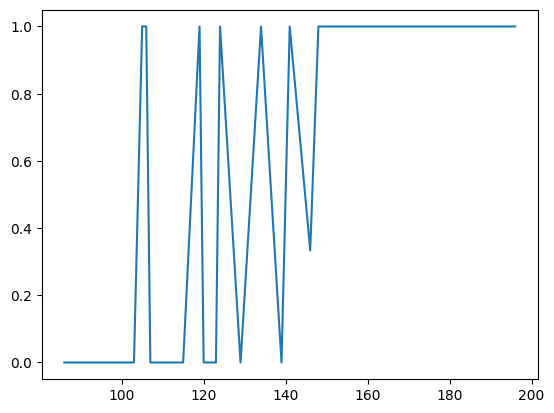

Eta presa in considerazione : 53


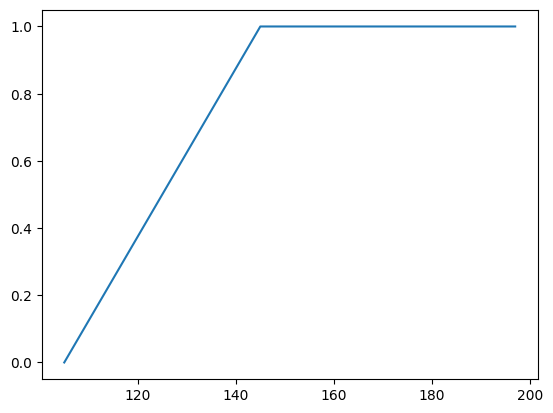

Eta presa in considerazione : 54


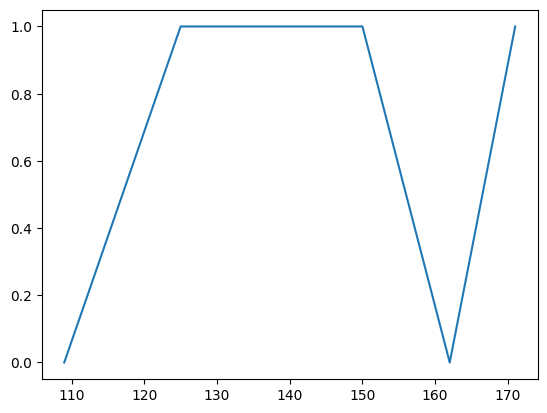

Eta presa in considerazione : 34


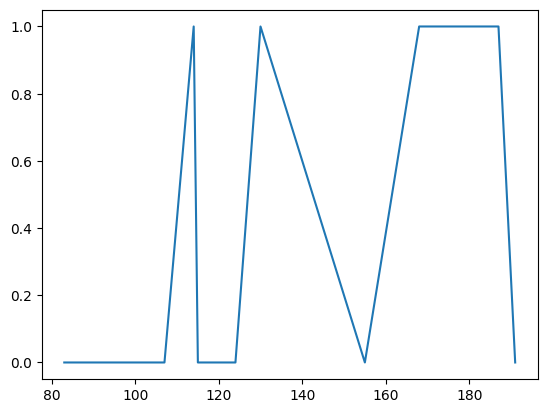

Eta presa in considerazione : 57


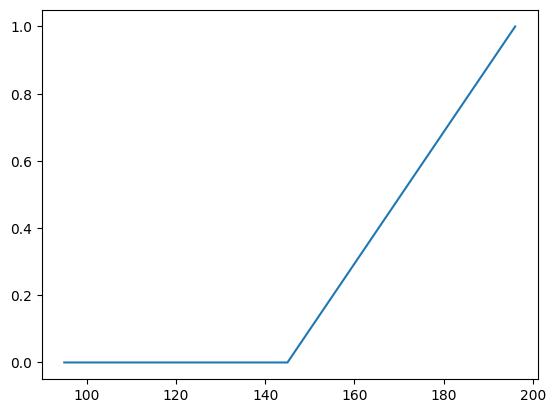

Eta presa in considerazione : 59


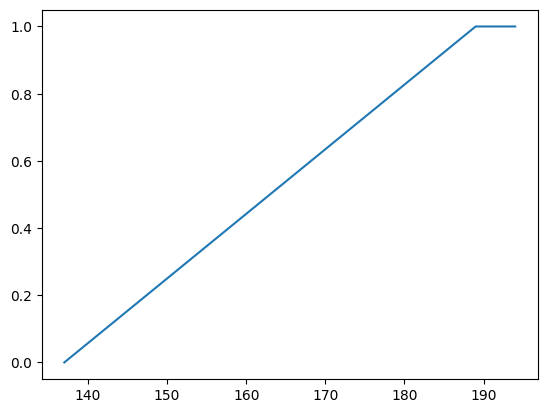

Eta presa in considerazione : 51


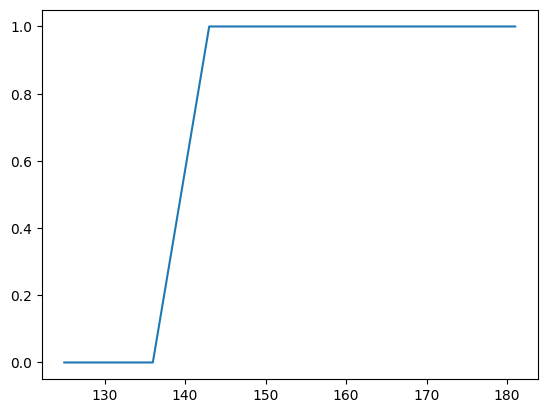

Eta presa in considerazione : 27


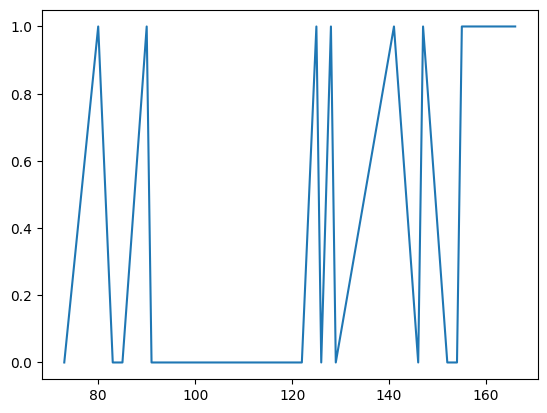

Eta presa in considerazione : 41


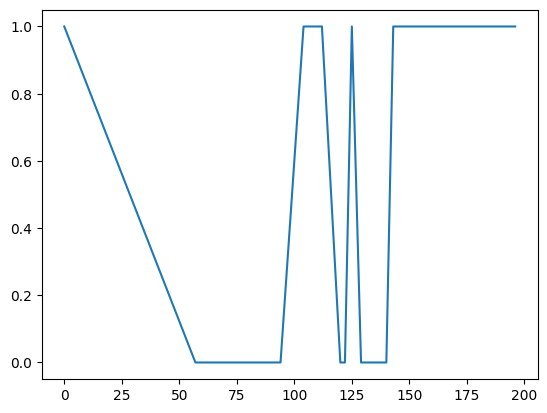

Eta presa in considerazione : 43


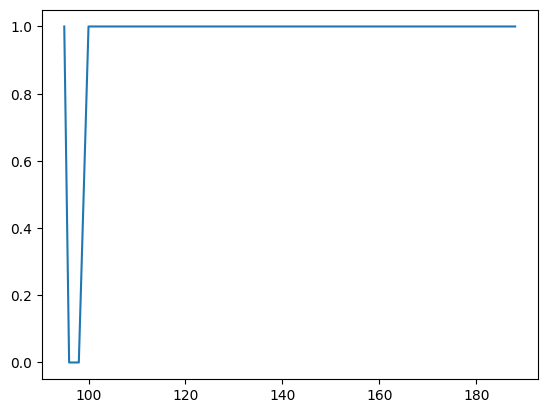

Eta presa in considerazione : 22


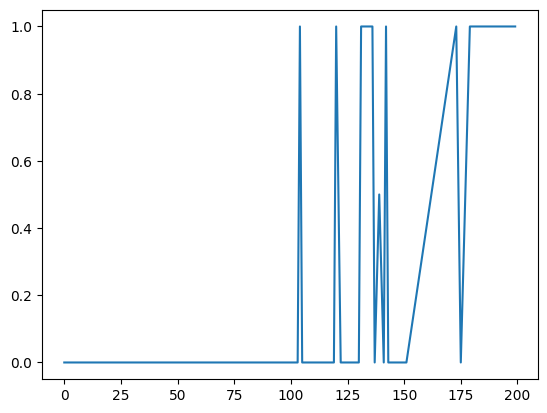

Eta presa in considerazione : 38


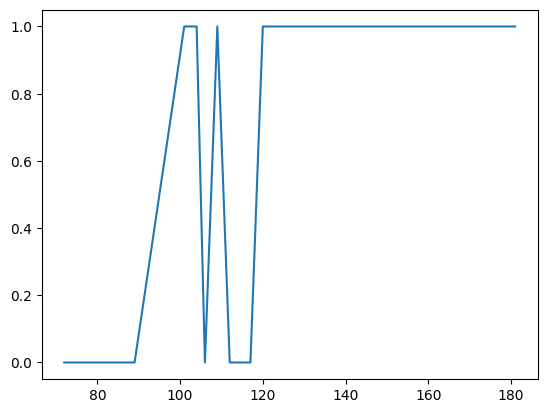

Eta presa in considerazione : 60


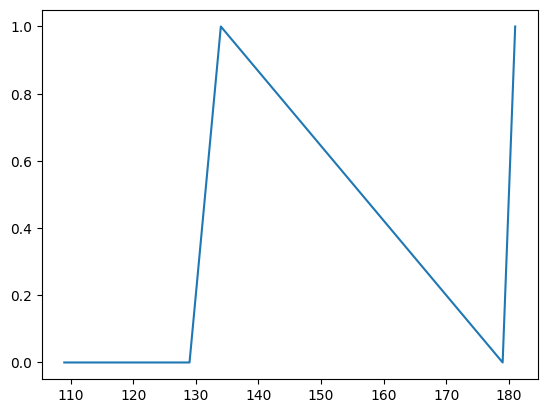

Eta presa in considerazione : 28


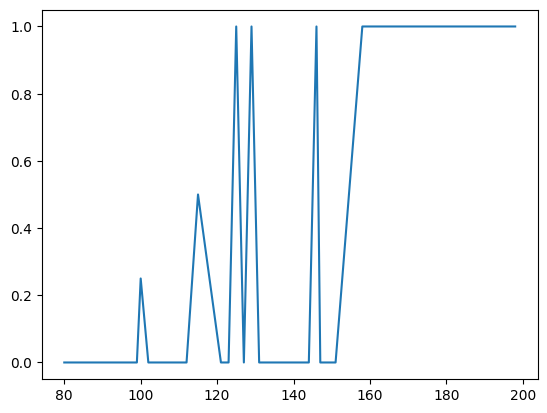

Eta presa in considerazione : 45


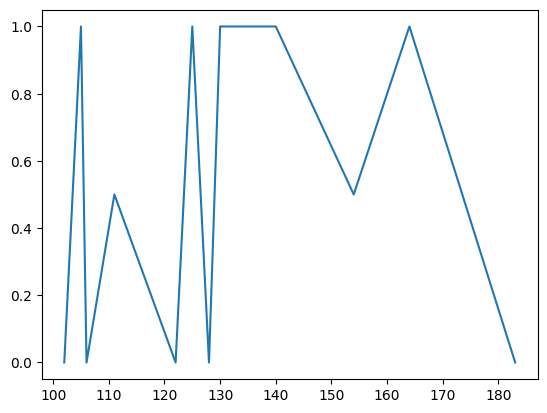

Eta presa in considerazione : 35


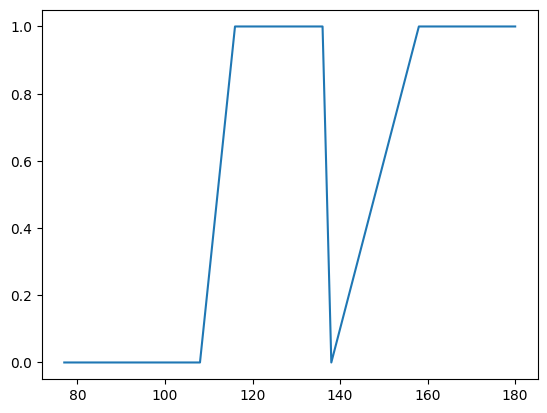

Eta presa in considerazione : 46


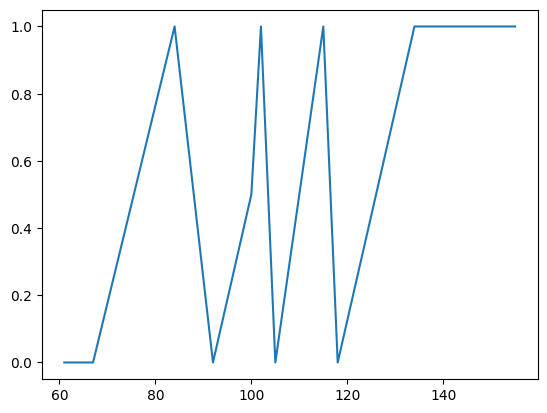

Eta presa in considerazione : 56


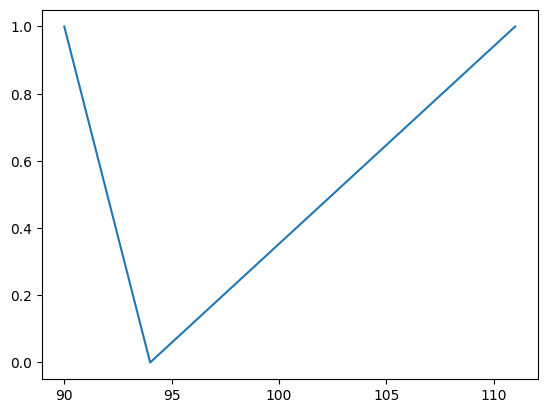

Eta presa in considerazione : 37


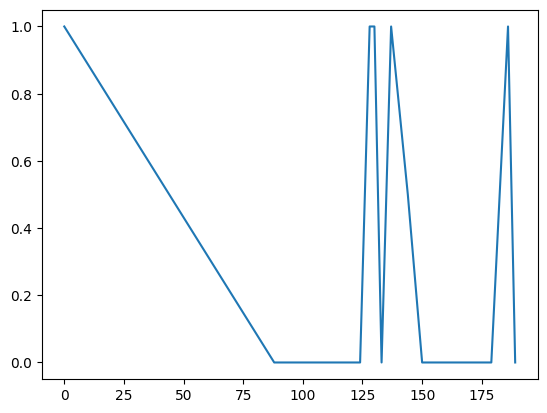

Eta presa in considerazione : 48


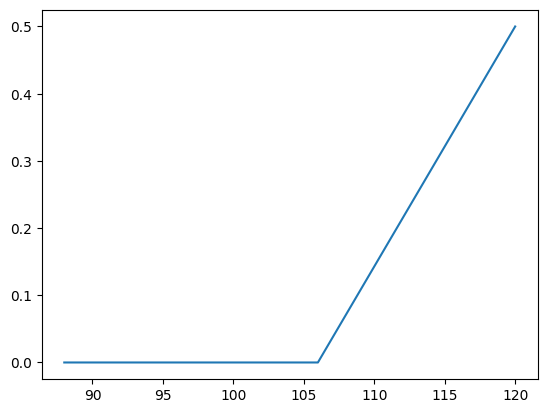

Eta presa in considerazione : 40


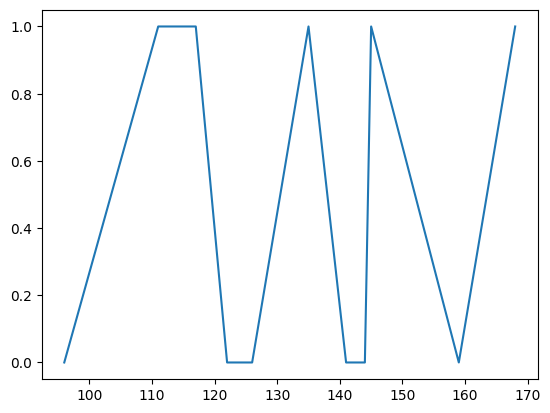

Eta presa in considerazione : 25


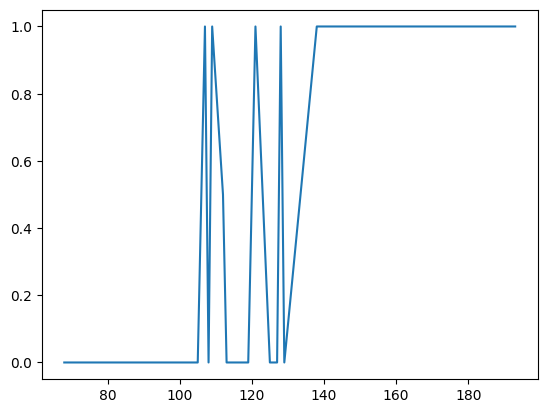

Eta presa in considerazione : 24


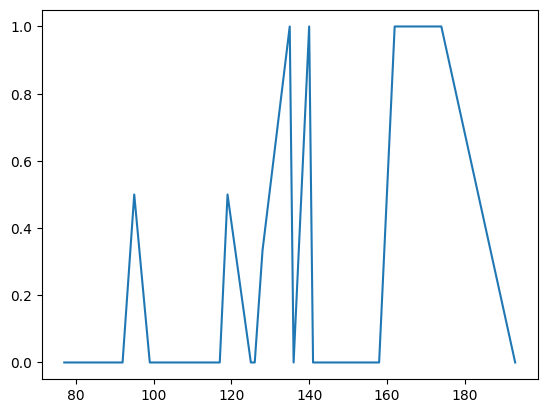

Eta presa in considerazione : 58


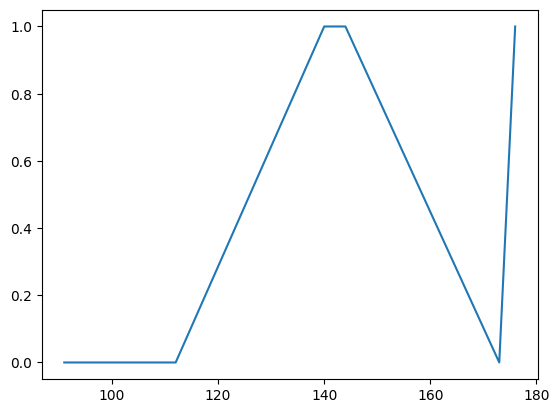

Eta presa in considerazione : 42


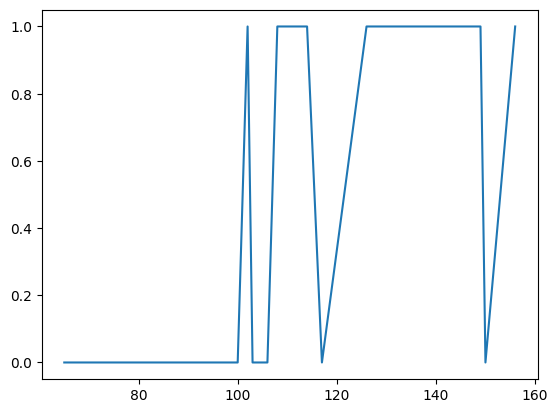

Eta presa in considerazione : 44


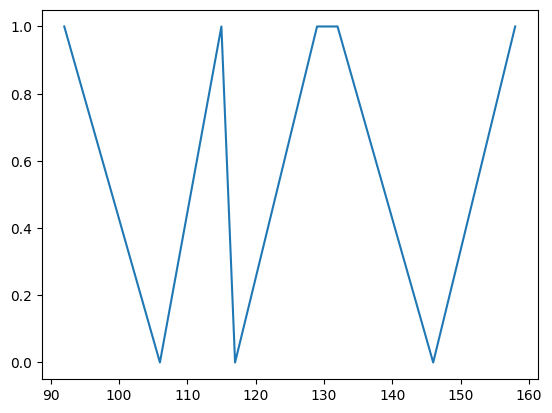

Eta presa in considerazione : 39


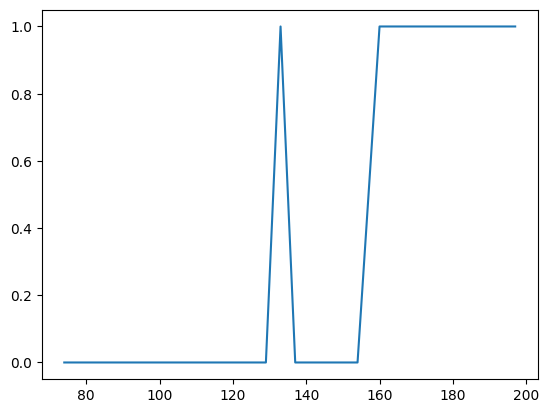

Eta presa in considerazione : 36


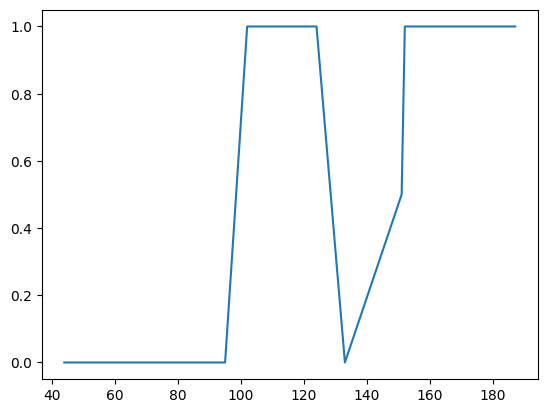

Eta presa in considerazione : 23


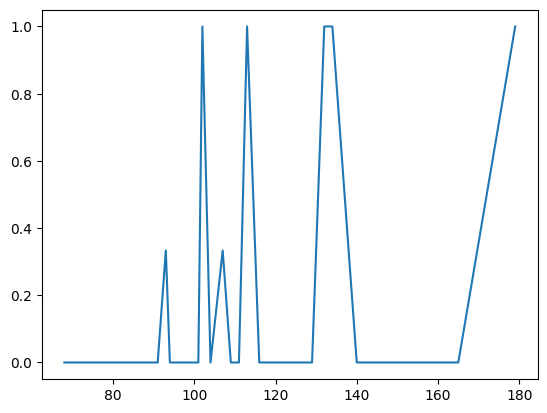

Eta presa in considerazione : 61


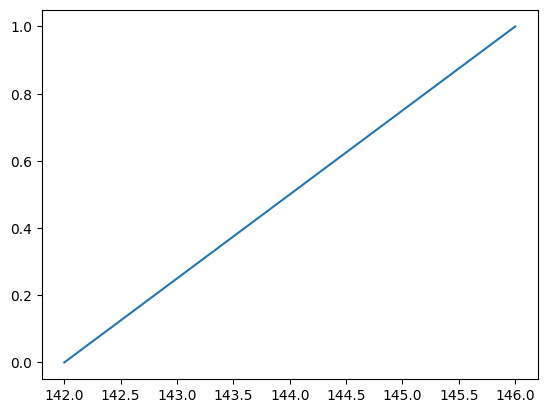

Eta presa in considerazione : 69


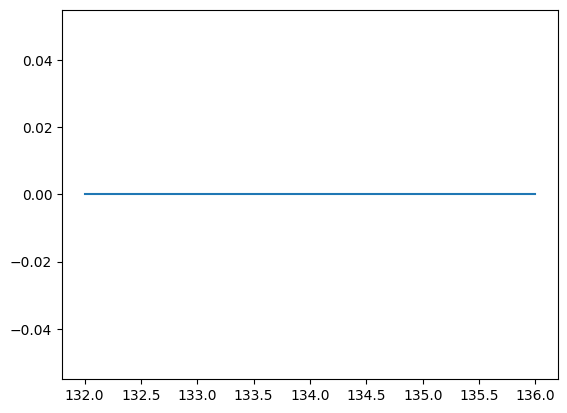

Eta presa in considerazione : 62


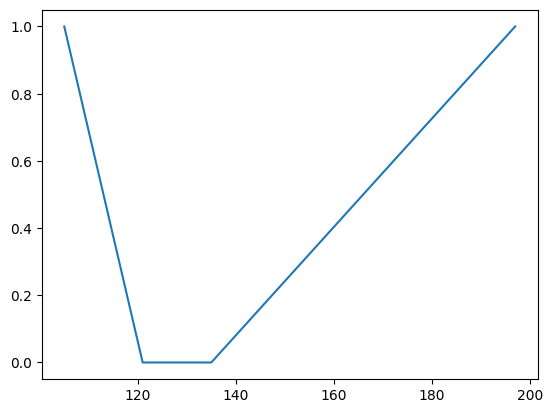

Eta presa in considerazione : 55


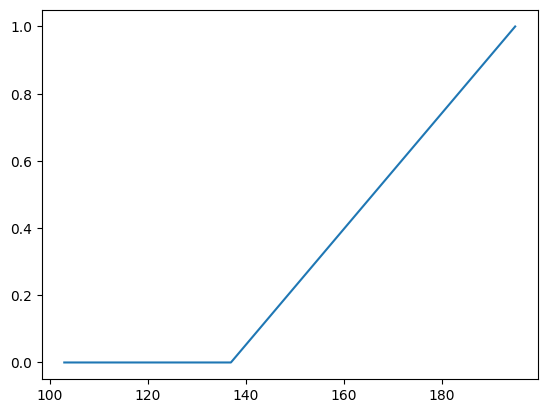

Eta presa in considerazione : 65


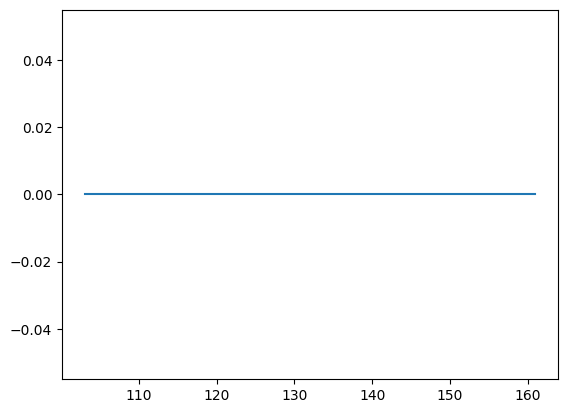

Eta presa in considerazione : 47


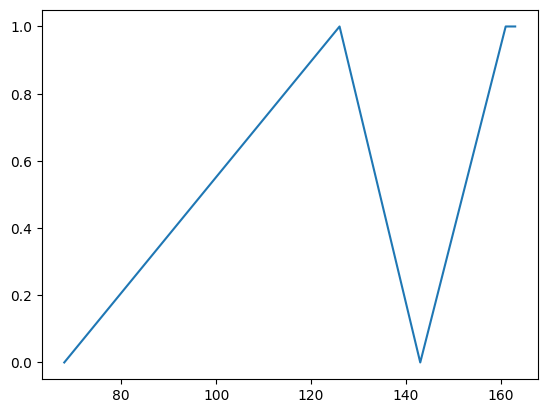

Eta presa in considerazione : 52


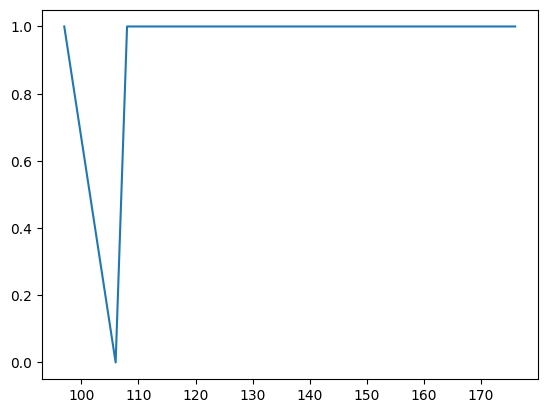

Eta presa in considerazione : 66


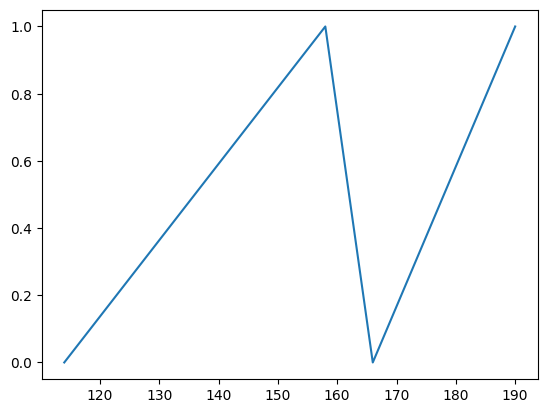

Eta presa in considerazione : 49


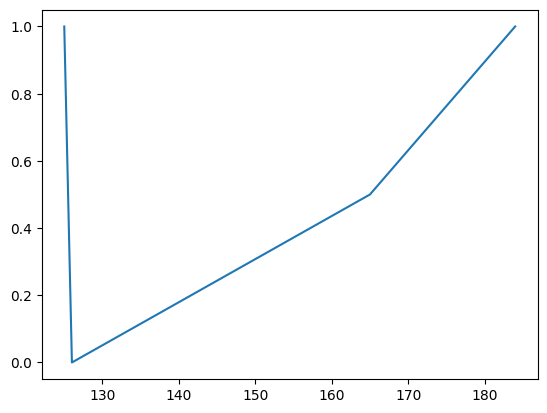

Eta presa in considerazione : 63


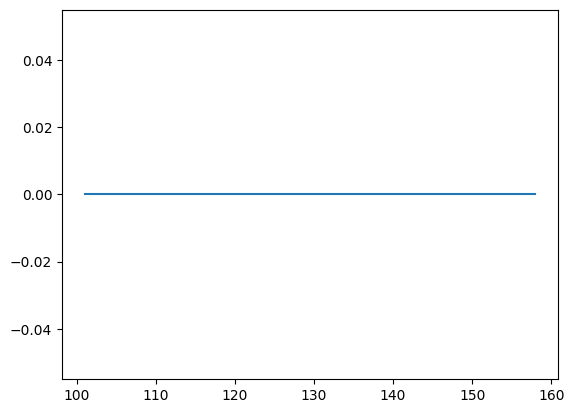

Eta presa in considerazione : 67


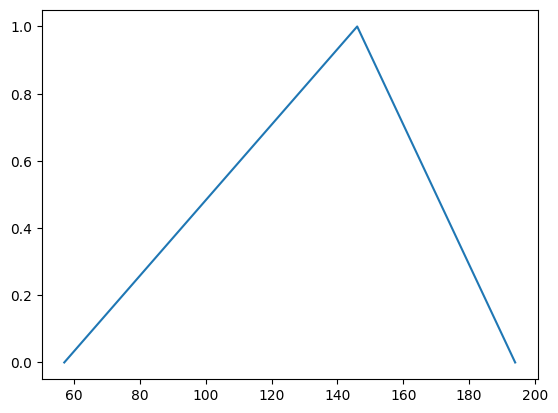

Eta presa in considerazione : 72


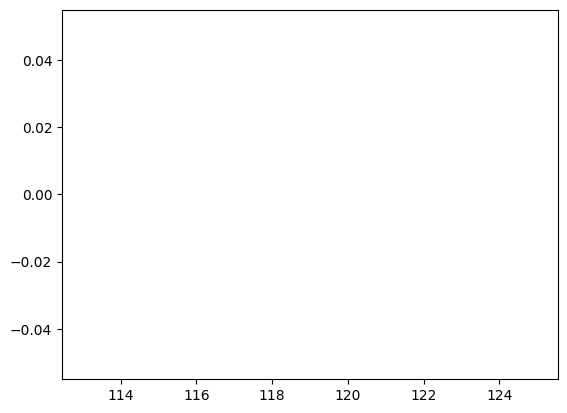

Eta presa in considerazione : 81


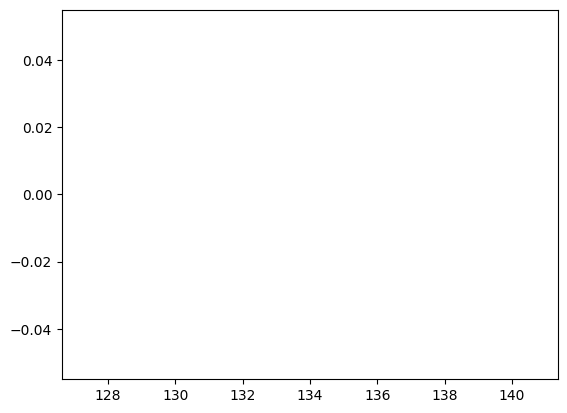

Eta presa in considerazione : 64


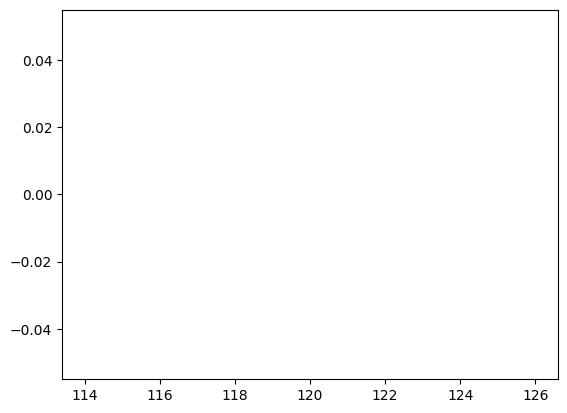

Eta presa in considerazione : 70


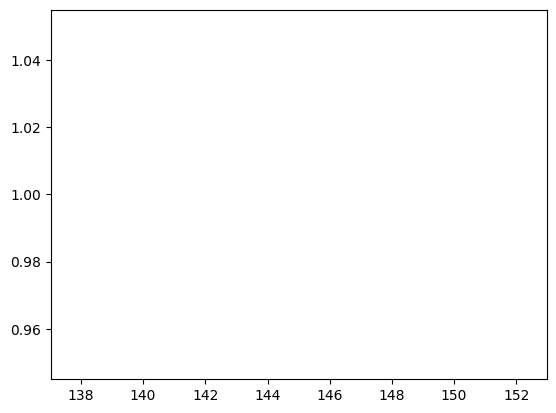

Eta presa in considerazione : 68


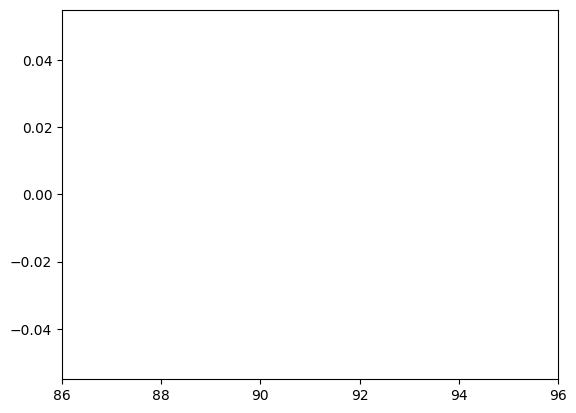

In [89]:
for age in diabete.Age.drop_duplicates():
    print('Eta presa in considerazione :', age)
    età = diabete[diabete.Age == age]
    glucosio = età.groupby(['Glucose']).mean().Outcome
    plt.plot(glucosio)
    plt.show()

accuratezza : 0.6298701298701299


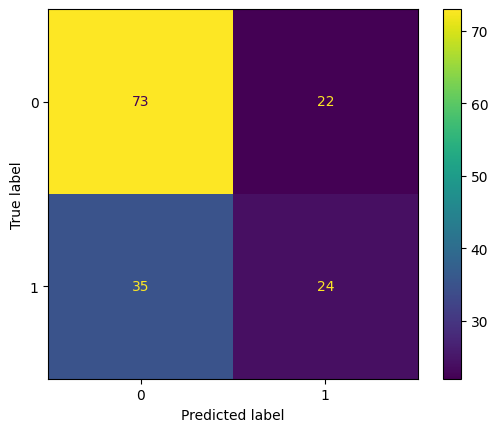

In [9]:
# Dividi il dataset in training set e test set

X = diabete.drop(['Outcome'], axis=1)
y = diabete.Outcome         

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Crea un decision tree classifier
classifier = DecisionTreeClassifier()

# Addestra il regressor sul training set
classifier.fit(X_train, y_train)

# Valuta le prestazioni del regressor sul test set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuratezza :", acc)

#matrice di confusione
cm = confusion_matrix(y_test, y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()